In [ ]:
!pip install --pre pycaret  # Install pycaret package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import setup, compare_models
df = pd.read_csv("kits_balanced_dataset.csv")
df.head()

,case_id,age_at_nephrectomy,gender,body_mass_index,comorbidities,smoking_history,age_when_quit_smoking,pack_years,chewing_tobacco_use,alcohol_use,...,operative_time,cytoreductive,positive_resection_margins,last_preop_egfr,first_postop_egfr,last_postop_egfr,vital_status,vital_days_after_surgery,voxel_spacing,malignant
0,128.0,60.0,1.0,38.54,33.0,1.0,35.0,0.000000,0.0,0.0,...,218.0,0.0,0.0,116.0,111.0,89.0,0.0,480.0,130.0,True
1,79.0,73.0,0.0,21.98,25.0,2.0,34.0,9.694737,0.0,1.0,...,430.0,0.0,0.0,45.0,45.0,60.0,1.0,688.0,8.0,True
2,205.0,67.0,0.0,31.09,0.0,2.0,36.0,9.694737,0.0,2.0,...,179.0,0.0,0.0,54.0,83.0,82.0,0.0,843.0,80.0,False
3,208.0,73.0,1.0,30.85,10.0,2.0,36.0,64.000000,0.0,2.0,...,613.0,0.0,0.0,28.0,40.0,27.0,0.0,1057.0,132.0,True
4,31.0,12.0,0.0,21.87,0.0,1.0,35.0,0.000000,0.0,1.0,...,275.0,0.0,0.0,142.0,155.0,155.0,0.0,2328.0,2.0,False


In [ ]:
df.isnull().sum().all()

False

In [ ]:
df.columns.values.tolist()

['case_id',
 'age_at_nephrectomy',
 'gender',
 'body_mass_index',
 'comorbidities',
 'smoking_history',
 'age_when_quit_smoking',
 'pack_years',
 'chewing_tobacco_use',
 'alcohol_use',
 'intraoperative_complications',
 'hospitalization',
 'ischemia_time',
 'radiographic_size',
 'pathologic_size',
 'pathology_t_stage',
 'pathology_n_stage',
 'pathology_m_stage',
 'tumor_histologic_subtype',
 'tumor_necrosis',
 'tumor_isup_grade',
 'clavien_surgical_complications',
 'er_visit',
 'readmission',
 'estimated_blood_loss',
 'surgery_type',
 'surgical_procedure',
 'surgical_approach',
 'operative_time',
 'cytoreductive',
 'positive_resection_margins',
 'last_preop_egfr',
 'first_postop_egfr',
 'last_postop_egfr',
 'vital_status',
 'vital_days_after_surgery',
 'voxel_spacing',
 'malignant']

In [ ]:
data= df.interpolate();
print(data)

        case_id  age_at_nephrectomy    gender  body_mass_index  comorbidities  \
0    128.000000           60.000000  1.000000        38.540000      33.000000   
1     79.000000           73.000000  0.000000        21.980000      25.000000   
2    205.000000           67.000000  0.000000        31.090000       0.000000   
3    208.000000           73.000000  1.000000        30.850000      10.000000   
4     31.000000           12.000000  0.000000        21.870000       0.000000   
..          ...                 ...       ...              ...            ...   
263   82.095493           64.171972  0.565606        29.081459       1.303183   
264   28.051803           64.599686  1.000000        26.957190       0.000000   
265  180.867029           67.000000  0.000000        30.170818       2.839173   
266  131.386014           60.054177  0.000000        25.950699       0.000000   
267  179.463502           63.875854  0.000000        31.168783       0.000000   

     smoking_history  age_w

In [ ]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == 

In [ ]:
from pycaret.classification import *
s = setup(data, target = 'malignant')

,Description,Value
0,Session id,8209
1,Target,malignant
2,Target type,Binary
3,Original data shape,"(268, 38)"
4,Transformed data shape,"(268, 38)"
5,Transformed train set shape,"(187, 38)"
6,Transformed test set shape,"(81, 38)"
7,Numeric features,37
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0680
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6270
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1670
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0830
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5410
dt,Decision Tree Classifier,0.9947,0.9950,0.9900,1.0000,0.9947,0.9895,0.9900,0.0700
ada,Ada Boost Classifier,0.9947,0.9950,0.9900,1.0000,0.9947,0.9895,0.9900,0.0870
gbc,Gradient Boosting Classifier,0.9947,1.0000,0.9900,1.0000,0.9947,0.9895,0.9900,0.2140
ridge,Ridge Classifier,0.9842,1.0000,0.9678,1.0000,0.9830,0.9683,0.9698,0.0760
lda,Linear Discriminant Analysis,0.9842,1.0000,0.9678,1.0000,0.9830,0.9683,0.9698,0.0400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
results = pull()

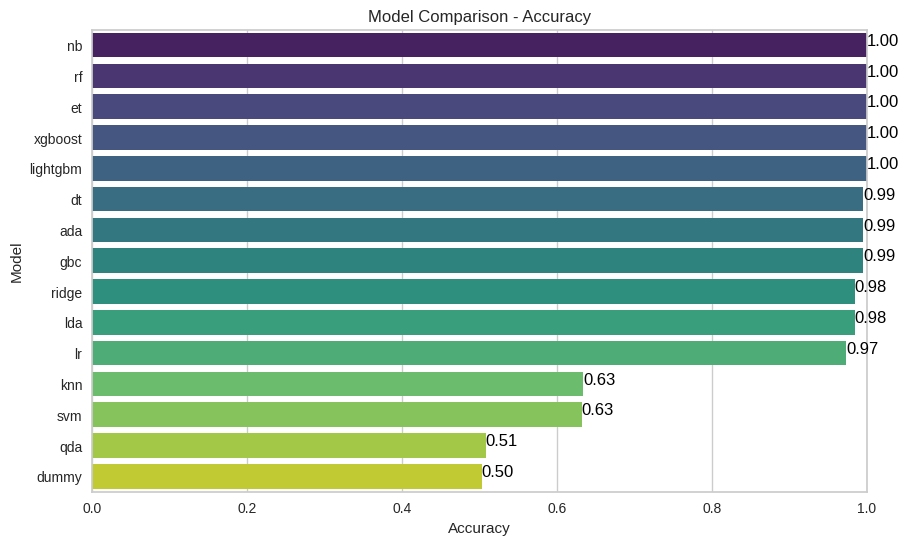

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Accuracy', y=results.index, data=results, palette='viridis')

# Annotate the bars with accuracy values
for index, value in enumerate(results['Accuracy']):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

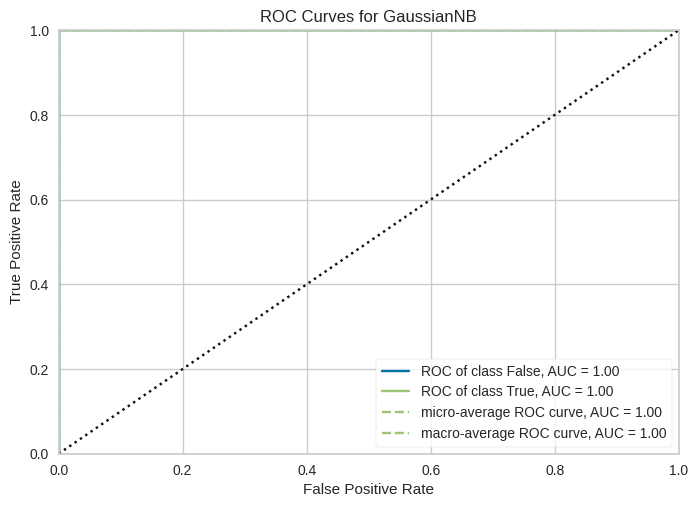

In [ ]:
plot_model(best)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8209, verbose=0,
                       warm_start=False)


In [ ]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8209, verbose=0,
                       warm_start=False)
